In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
file = './HistoricoPeajesColombia.csv'

In [2]:
#Lee el csv
df = pd.read_csv(file, encoding="latin-1", delimiter=",")
df.head()
#Verificamos los tipos de datos de las columnas, para saber si están correctos
print(df.dtypes)


IdPeaje                int64
Peaje                 object
IdCategoriaTarifa     object
FechaDesde            object
FechaHasta            object
ValorTarifa           object
Trafico               object
TraficoEvasores       object
TraficoExentos787    float64
Lat                  float64
Lon                  float64
dtype: object


C:\Users\leidy.morales\AppData\Local\Temp\ipykernel_21416\1442134375.py:2: DtypeWarning: Columns (5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding="latin-1", delimiter=",")


In [3]:
#Transformación de columnas por tipos de datos correctos
df['TraficoEvasores'] = pd.to_numeric(df['TraficoEvasores'], errors='coerce').astype('Int32')
df['TraficoExentos787'] = pd.to_numeric(df['TraficoExentos787'], errors='coerce').astype('Int32')
df['Trafico'] = pd.to_numeric(df['Trafico'], errors='coerce').astype('Int32')
df['ValorTarifa'] = pd.to_numeric(df['ValorTarifa'], errors='coerce').astype('Int32')
df['FechaHasta'] = pd.to_datetime(df['FechaHasta'], errors='coerce')
df['FechaDesde'] = pd.to_datetime(df['FechaDesde'], errors='coerce')

In [4]:
print(df.dtypes)

IdPeaje                       int64
Peaje                        object
IdCategoriaTarifa            object
FechaDesde           datetime64[ns]
FechaHasta           datetime64[ns]
ValorTarifa                   Int32
Trafico                       Int32
TraficoEvasores               Int32
TraficoExentos787             Int32
Lat                         float64
Lon                         float64
dtype: object


In [5]:
#------------------------------------Limpieza y preparación de datos------------------------------
#Función que nos permite ver valores faltantes
def valores_faltantes(df):
    # Verifica los valores faltantes en cada columna
    values = df.isnull().sum()
    print("Valores faltantes por columna:")
    print(values)
    
valores_faltantes(df)


Valores faltantes por columna:
IdPeaje                 0
Peaje                   1
IdCategoriaTarifa       1
FechaDesde              2
FechaHasta              0
ValorTarifa             1
Trafico                 1
TraficoEvasores      2046
TraficoExentos787    2025
Lat                     0
Lon                     0
dtype: int64


In [6]:
#columna Peaje
#Busca el id asociado a ese valor nulo en la columna peaje
id_peaje_null = df[df['Peaje'].isnull()]['IdPeaje']

#Busca si existen más idPeaje para obtener el valor de la columna peaje y se usa su primer valor
peaje_name = df[df['IdPeaje'].isin(id_peaje_null)]['Peaje'].iloc[0]

#Reemplaza la columna peaje que estaba nula con el valor correcto
df.loc[df['IdPeaje'].isin(id_peaje_null), 'Peaje'] = peaje_name

valores_faltantes(df)

Valores faltantes por columna:
IdPeaje                 0
Peaje                   0
IdCategoriaTarifa       1
FechaDesde              2
FechaHasta              0
ValorTarifa             1
Trafico                 1
TraficoEvasores      2046
TraficoExentos787    2025
Lat                     0
Lon                     0
dtype: int64


In [7]:
#Columna IdCategoriaTarifa
#Busca el id asociado a el valor nulo asociado a la columna IdCategoriaTarifa
id_cat_null = df[df['IdCategoriaTarifa'].isnull()]['IdPeaje']
#Busca el valorTarifa asociado a el valor nulo asociado a la columna IdCategoriaTarifa
tarifa = df[df['IdCategoriaTarifa'].isnull()]['ValorTarifa']
#Busca donde halla un valorTarifa que corresponda a la anterior y se obtiene el IdCategoriaTarifa ya que cada tarifa
#tiene asociada una categoría y se usa el primer valor
category = df[df['ValorTarifa'].isin(tarifa)]['IdCategoriaTarifa'].iloc[0]
#Reemplaza la columna IdCategoriaTarifa con la categoría adecuada
df.loc[df['IdPeaje'].isin(id_cat_null), 'IdCategoriaTarifa'] = category

valores_faltantes(df)

Valores faltantes por columna:
IdPeaje                 0
Peaje                   0
IdCategoriaTarifa       0
FechaDesde              2
FechaHasta              0
ValorTarifa             1
Trafico                 1
TraficoEvasores      2046
TraficoExentos787    2025
Lat                     0
Lon                     0
dtype: int64


In [8]:
#Columna valorTarifa
#Busca el índice asociado a el valor nulo asociado a la columna ValorTarifa
index_valor_tarifa_null = df[df['ValorTarifa'].isnull()].index
#Busca el IdCategoriaTarifa asociado al valor nulo valorTarifa
id_valor_tarifa = df[df['ValorTarifa'].isnull()]['IdCategoriaTarifa']
#Busca donde halla un IdCategoriaTarifa que corresponda con el encontrado con anterioridad y devuelve el valorTarifa
#se usa el primer valor encontrado, es decir lo contrario de lo que se hizo con anterioridad
valor_tarifa = df[df['IdCategoriaTarifa'].isin(id_valor_tarifa)]['ValorTarifa'].iloc[0]
#Se reemplaza el valorTarifa nulo con el correspondiente
df.loc[df.index.isin(index_valor_tarifa_null), 'ValorTarifa'] = valor_tarifa

valores_faltantes(df)

Valores faltantes por columna:
IdPeaje                 0
Peaje                   0
IdCategoriaTarifa       0
FechaDesde              2
FechaHasta              0
ValorTarifa             0
Trafico                 1
TraficoEvasores      2046
TraficoExentos787    2025
Lat                     0
Lon                     0
dtype: int64


In [9]:
#Columna FechaDesde, se observa que existen 2 valores nulos
#Busca el indíce asociado a el valor nulo de la columna FechaDesde
index_fecha_null = df[df['FechaDesde'].isnull()].index
#Busca la FechaHasta asociada al valor nulo FechaDesde
fecha_hasta = df[df['FechaDesde'].isnull()]['FechaHasta']
#Fecha inicial a partir de la FechaHasta
fecha_desde = fecha_hasta.dt.to_period('M').dt.to_timestamp()
#Se actualiza la fecha faltante con la fecha calcula, esto porque al validar los datos se evidencia concordancia en las columnas fechaDesde y fechaHasta
#Donde la fechaDesde marca el inicio del mes y la fechaHasta el final
df.loc[df.index.isin(index_fecha_null), 'FechaDesde'] = fecha_desde

valores_faltantes(df)

Valores faltantes por columna:
IdPeaje                 0
Peaje                   0
IdCategoriaTarifa       0
FechaDesde              0
FechaHasta              0
ValorTarifa             0
Trafico                 1
TraficoEvasores      2046
TraficoExentos787    2025
Lat                     0
Lon                     0
dtype: int64


In [10]:
#Columna Trafico
#Se busca el índice del trafico que se encuentra nulo
index_trafico_null = df[df['Trafico'].isnull()].index

#Si no hay valores en trafico se asume la suma de ambos traficos
trafico_total = df[df['Trafico'].isnull()][['TraficoExentos787', 'TraficoEvasores']].sum().sum()
#Se reemplaza el valor nulo por dicha suma
df.loc[df.index.isin(index_trafico_null), 'Trafico'] = trafico_total

valores_faltantes(df)

Valores faltantes por columna:
IdPeaje                 0
Peaje                   0
IdCategoriaTarifa       0
FechaDesde              0
FechaHasta              0
ValorTarifa             0
Trafico                 0
TraficoEvasores      2046
TraficoExentos787    2025
Lat                     0
Lon                     0
dtype: int64


In [11]:
#Columna traficoEvasores
#Se pone en 0 las columna puesto que si el trafico que es el total está en 0 no tiene sentido que tenga trafico de ningún tipo
df.loc[df['Trafico'] == 0, 'TraficoEvasores'] = 0
#Se busca el índice del traficoEvasores que se encuentra nulo
index_trafico_evasores_null = df[df['TraficoEvasores'].isnull()].index
#Se reemplaza el valor nulo por -1 para luego analizar los datos, esto es más facil que tratar con datos null
df.loc[df.index.isin(index_trafico_evasores_null), 'TraficoEvasores'] = -1

valores_faltantes(df)

Valores faltantes por columna:
IdPeaje                 0
Peaje                   0
IdCategoriaTarifa       0
FechaDesde              0
FechaHasta              0
ValorTarifa             0
Trafico                 0
TraficoEvasores         0
TraficoExentos787    2025
Lat                     0
Lon                     0
dtype: int64


In [12]:
#Columna TraficoExentos787 
#Se pone en 0 las columna puesto que si el trafico que es el total está en 0 no tiene sentido que tenga trafico de ningún tipo
df.loc[df['Trafico'] == 0, 'TraficoExentos787'] = 0
#Se busca el índice del TraficoExentos787  que se encuentra nulo
index_trafico_evasores_null = df[df['TraficoExentos787'].isnull()].index
#Se reemplaza el valor nulo por -1 para luego analizar los datos, esto es más facil que tratar con datos null
df.loc[df.index.isin(index_trafico_evasores_null), 'TraficoExentos787'] = -1

valores_faltantes(df)

Valores faltantes por columna:
IdPeaje              0
Peaje                0
IdCategoriaTarifa    0
FechaDesde           0
FechaHasta           0
ValorTarifa          0
Trafico              0
TraficoEvasores      0
TraficoExentos787    0
Lat                  0
Lon                  0
dtype: int64


In [27]:
#Exportación de csv modificado para validar dichas modificaciones
df.to_csv('output.csv')

In [13]:
#-----------------------------Agrupación y calculo de ingresos--------------------------------------
#Se agrupan los datos por IdPeaje y se recupera tanto el id como el nombre del peaje para mejor lectura del usuario, luego se calcula el total acumulado
ingresos_por_peaje = df.groupby(["IdPeaje", "Peaje"])["ValorTarifa"].sum()

print(ingresos_por_peaje)

IdPeaje  Peaje         
1        ALVARADO          12622500
2        CHICORAL          17864300
3        CHINAUTA          14811700
4        HONDA             12491100
5        COCORNÁ           11222700
                             ...   
176      PANDEQUESO         1261100
178      TRAPICHE           1293400
183      PONEDERA           1410300
184      PUENTE QUETAME     3733000
185      ABURRÁ             6212100
Name: ValorTarifa, Length: 145, dtype: Int32


In [14]:
#----------------------------------Análisis de Tráfico-------------------------------------------------------
#Se agrupan los datos por idCategoriaTarifa y se obtienen los valores maximos y minimos de cada una
max_trafico_dia = df.groupby(["IdCategoriaTarifa"])["Trafico"].max()
min_trafico_dia = df.groupby(["IdCategoriaTarifa"])["Trafico"].min()

print(max_trafico_dia)
print(min_trafico_dia)

IdCategoriaTarifa
E1-III       5093
E1-IV        3868
E1-V         3024
E1-VI        5889
E1-VII       6680
E2-II         414
E2-III       4843
E2-IV        3625
E2-V         3263
E2-VII       5768
EA            592
EC          47776
EG            696
ER           3087
EXCI          190
EXCII          27
EXCIII          4
I         1120843
IE         308698
IE1          5508
IE10        34704
IE2         24699
IE3             8
IEE         33469
IEEE        15286
II         165309
IIA          8078
IIE         74309
IIE1         3891
III         83394
IIIE         9302
IV          67173
IVE          9989
IX          10567
IXE         12457
POLCA        5431
V           60037
VE           9737
VE1           326
VI          34702
VIE          2757
VII         42637
VIIE         7174
VIII         5733
VIIIE        2095
Name: Trafico, dtype: Int32
IdCategoriaTarifa
E1-III     766
E1-IV      522
E1-V       558
E1-VI      991
E1-VII    1268
E2-II      247
E2-III     892
E2-IV      621
E2-V  

In [15]:
#------------------------------------Estadísticas Descriptivas-----------------------------
#Se obtienen la media, mediana y desviación estandar de las columnas valorTarifa y Trafico
media_valorTarifa = np.mean(df["ValorTarifa"])
mediana_valorTarifa = np.median(df["ValorTarifa"])
desviacion_valorTarifa = np.std(df["ValorTarifa"])

media_trafico = np.mean(df["Trafico"])
mediana_trafico = np.median(df["Trafico"])
desviacion_trafico = np.std(df["Trafico"])

print("ValorTarifa: \nMedia =", media_valorTarifa, "\nMediana =", mediana_valorTarifa, "\nDesviación Estándar =", desviacion_valorTarifa)
print("Trafico: \nMedia =", media_trafico, "\nMediana =", mediana_trafico, "\nDesviación Estándar =", desviacion_trafico)


ValorTarifa: 
Media = 17331.841393200822 
Mediana = 11100.0 
Desviación Estándar = 16308.505585578225
Trafico: 
Media = 19696.596128415356 
Mediana = 3657.0 
Desviación Estándar = 54804.33015476896


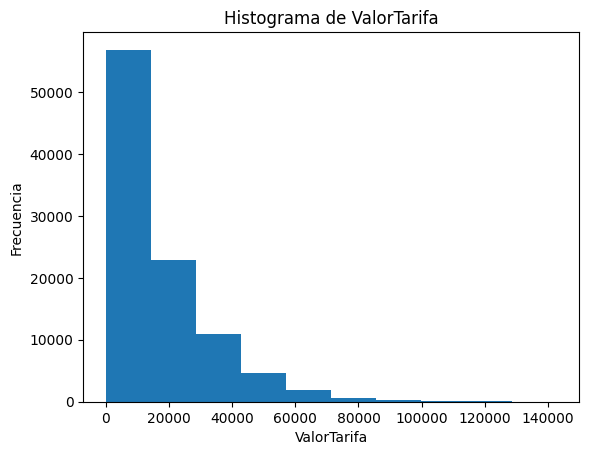

In [238]:
#-------------------------Histograma de “ValorTarifa”-----------------------------------
plt.hist(df["ValorTarifa"])
plt.title('Histograma de ValorTarifa')
plt.xlabel('ValorTarifa')
plt.ylabel('Frecuencia')
plt.show()

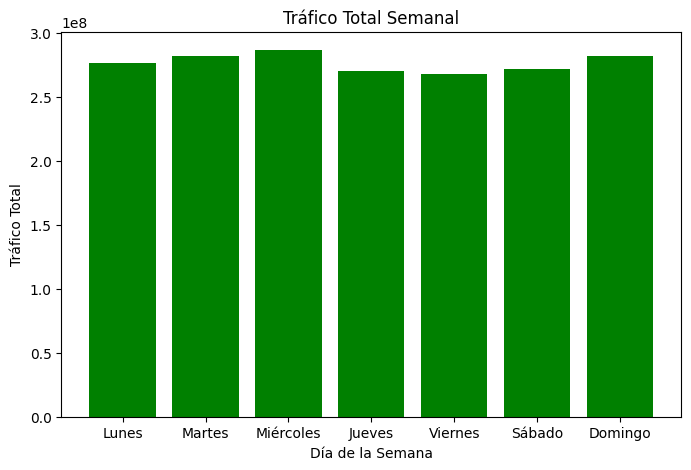

In [239]:
#------------------Gráfico de Tráfico Semanal--------------------------------
#Se obtiene el nombre del día de la semana
df['DiaSemana'] = df['FechaDesde'].dt.day_name()
#Se agrupa el trafico semanal por el dia de la semana
trafico_semanal = df.groupby('DiaSemana')['Trafico'].sum()

#se crea diccionario de traducción de días de la semana, ya que estos salian en inglés
traduccion_dias = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

#se aplica la traducción de los días de la semana
trafico_semanal.index = trafico_semanal.index.map(traduccion_dias)
#Se organizan los días de la semana
trafico_semanal = trafico_semanal.reindex(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
#Se determina el tamaño de la grafica
fig, ax = plt.subplots(figsize=(8, 5))
plt.bar(trafico_semanal.index, trafico_semanal, color='green')
plt.title('Tráfico Total Semanal')
plt.xlabel('Día de la Semana')
plt.ylabel('Tráfico Total')

plt.show()

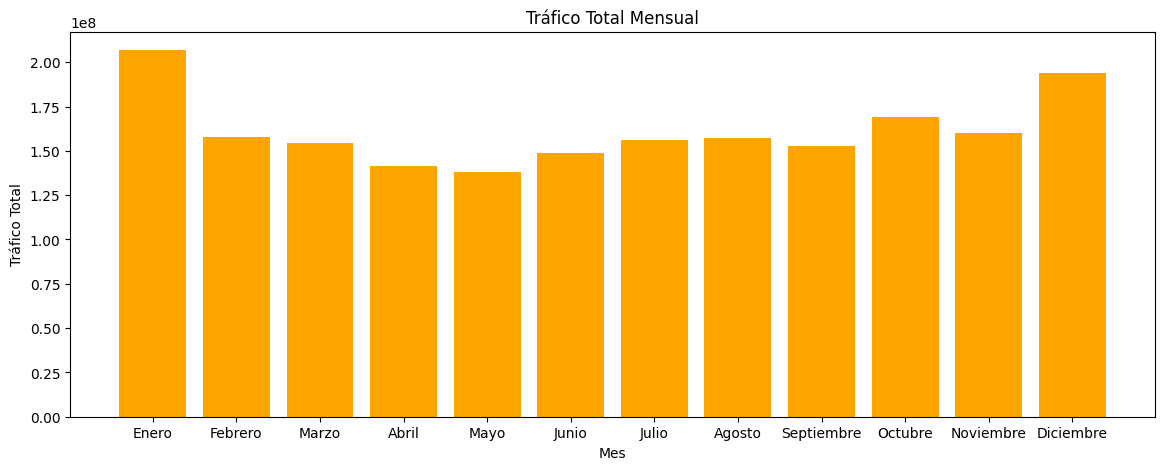

In [240]:
#------------------Gráfico de Tráfico Mensual--------------------------------
#Se obtiene el nombre del mes
df['Mes'] = df['FechaDesde'].dt.month_name()
#Se agrupa el trafico mensual por mes
trafico_mensual = df.groupby('Mes')['Trafico'].sum()

#se crea diccionario de traducción de los meses del año
traduccion_meses = {
    'January': 'Enero',
    'February': 'Febrero',
    'March': 'Marzo',
    'April': 'Abril',
    'May': 'Mayo',
    'June': 'Junio',
    'July': 'Julio',
    'August': 'Agosto',
    'September': 'Septiembre',
    'October': 'Octubre',
    'November': 'Noviembre',
    'December': 'Diciembre'
}

# se aplica traducción de los meses
trafico_mensual.index = trafico_mensual.index.map(traduccion_meses)
# ordena los meses
trafico_mensual = trafico_mensual.reindex(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])

#Da tamaño a la grafica
fig, ax = plt.subplots(figsize=(14, 5))
plt.bar(trafico_mensual.index, trafico_mensual, color='orange')
plt.title('Tráfico Total Mensual')
plt.xlabel('Mes')
plt.ylabel('Tráfico Total')
plt.show()

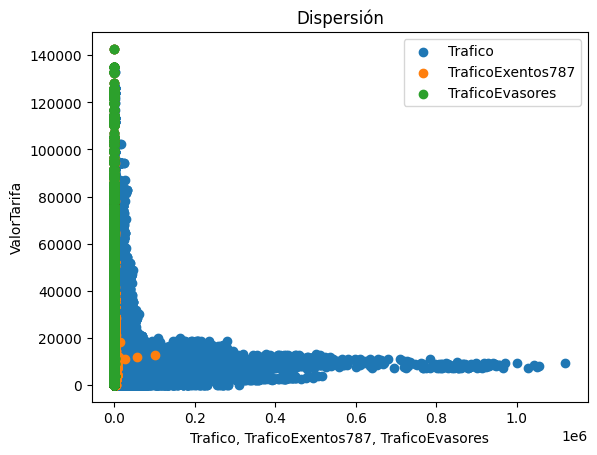

In [241]:
#-------------------------------- Modelo de Regresión Lineal---------------------------------
#Se verifica si los datos son líneales usando matploit como se ha usado con anterioridad solo que está vez usaremos scatter que es para graficar dispersiones
plt.scatter(df['Trafico'], df['ValorTarifa'], label='Trafico')
plt.scatter(df['TraficoExentos787'], df['ValorTarifa'], label='TraficoExentos787')
plt.scatter(df['TraficoEvasores'], df['ValorTarifa'], label='TraficoEvasores')
    
plt.title('Dispersión')
plt.xlabel('Trafico, TraficoExentos787, TraficoEvasores')
plt.ylabel('ValorTarifa')
plt.legend()
    
plt.show()


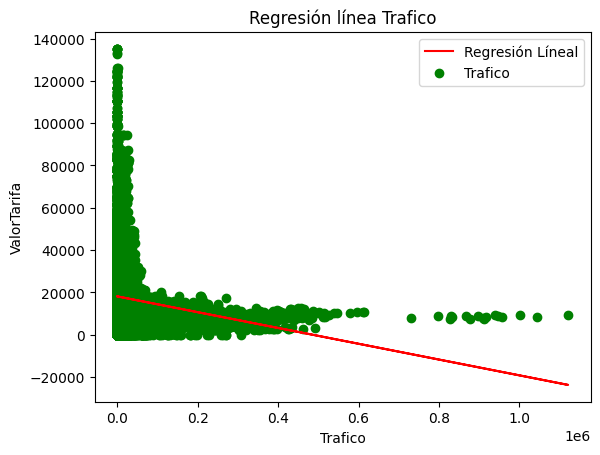

Coeficiente de Determinación (R-squared): 0.016664570581882976
Error Cuadrático Medio (RMSE): 16140.522404232033


In [242]:
#--------------Grafico Regresión lineal simple del Trafico--------------------------------
#Crear Modelo de Regresión Lineal
X_trafico = df['Trafico']
y_trafico = df['ValorTarifa']
X_train_trafico, X_test_trafico, y_train_trafico, y_test_trafico = train_test_split(X_trafico, y_trafico)
#Se crea modelo
LR = LinearRegression()
#Entrenamos el modelo, reshape permite minimizar los errores volviendolos datos bidimensionales
LR.fit(X_train_trafico.values.reshape(-1,1), y_train_trafico.values)
#predicción sobre los datos en base al entrenamiento
prediccion= LR.predict(X_test_trafico.values.reshape(-1,1))

plt.plot(X_test_trafico, prediccion, label="Regresión Líneal", color='red')
plt.scatter(X_test_trafico, y_test_trafico, label="Trafico", color='green')
plt.title('Regresión línea Trafico')
plt.xlabel('Trafico')
plt.ylabel('ValorTarifa')
plt.legend()
plt.show()

# ---------------------------Evaluar el rendimiento del modelo-----------------------------------
r2 = r2_score(y_test_trafico, prediccion)
rmse = mean_squared_error(y_test_trafico, prediccion, squared=False)

print("Coeficiente de Determinación (R-squared):", r2)
print("Error Cuadrático Medio (RMSE):", rmse)

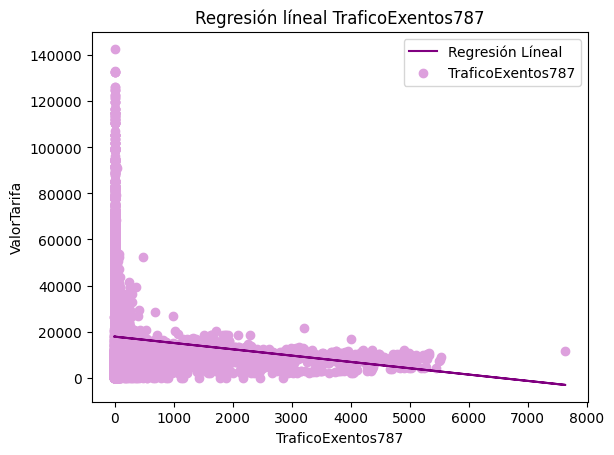

Coeficiente de Determinación (R-squared): 0.020337053404311134
Error Cuadrático Medio (RMSE): 16075.190955171254


In [243]:
#--------------Grafico Regresión lineal simple del TraficoExentos787--------------------------------

X_trafico = df['TraficoExentos787']
y_trafico = df['ValorTarifa']
X_train_trafico, X_test_trafico, y_train_trafico, y_test_trafico = train_test_split(X_trafico, y_trafico)

LR = LinearRegression()

LR.fit(X_train_trafico.values.reshape(-1,1), y_train_trafico.values)

prediccion= LR.predict(X_test_trafico.values.reshape(-1,1))

plt.plot(X_test_trafico, prediccion, label="Regresión Líneal", color='purple')
plt.scatter(X_test_trafico, y_test_trafico, label="TraficoExentos787", color='plum')
plt.title('Regresión líneal TraficoExentos787')
plt.xlabel('TraficoExentos787')
plt.ylabel('ValorTarifa')
plt.legend()
plt.show()

# ---------------------------Evaluar el rendimiento del modelo-----------------------------------
r2 = r2_score(y_test_trafico, prediccion)
rmse = mean_squared_error(y_test_trafico, prediccion, squared=False)

print("Coeficiente de Determinación (R-squared):", r2)
print("Error Cuadrático Medio (RMSE):", rmse)

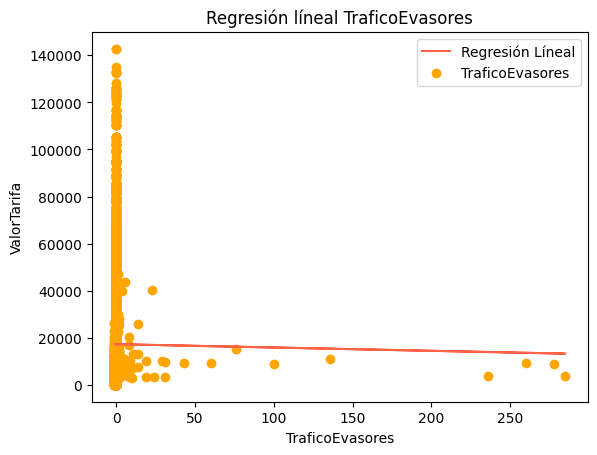

Coeficiente de Determinación (R-squared): 2.415174968306566e-05
Error Cuadrático Medio (RMSE): 16510.91033436416


In [245]:
#--------------Grafico Regresión lineal simple del TraficoEvasores--------------------------------

X_trafico = df['TraficoEvasores']
y_trafico = df['ValorTarifa']
X_train_trafico, X_test_trafico, y_train_trafico, y_test_trafico = train_test_split(X_trafico, y_trafico)

LR = LinearRegression()

LR.fit(X_train_trafico.values.reshape(-1,1), y_train_trafico.values)

prediccion= LR.predict(X_test_trafico.values.reshape(-1,1))

plt.plot(X_test_trafico, prediccion, label="Regresión Líneal", color='tomato')
plt.scatter(X_test_trafico, y_test_trafico, label="TraficoEvasores", color='orange')
plt.title('Regresión líneal TraficoEvasores')
plt.xlabel('TraficoEvasores')
plt.ylabel('ValorTarifa')
plt.legend()
plt.show()

# ---------------------------Evaluar el rendimiento del modelo-----------------------------------
r2 = r2_score(y_test_trafico, prediccion)
rmse = mean_squared_error(y_test_trafico, prediccion, squared=False)

print("Coeficiente de Determinación (R-squared):", r2)
print("Error Cuadrático Medio (RMSE):", rmse)

In [ ]:
#Se concluye que dado el R-squared es muy cercano a 0 lo que indica que el modelo no está sirviendo para explicar correctamente los datos en cada uno de los casos
#Tambien el RMSE ya que se tiene un valor tan alto se podría determinar que los valores que están predecidos están muy alejados de la realidad, esto podemos verlo a tráves de las diferentes graficas
#En el caso del primer modelo usando la columna trafico vemos un valor negativo, allí nos damos cuenta que en realidad el modelo no nos está aportando nada para predecir los valores

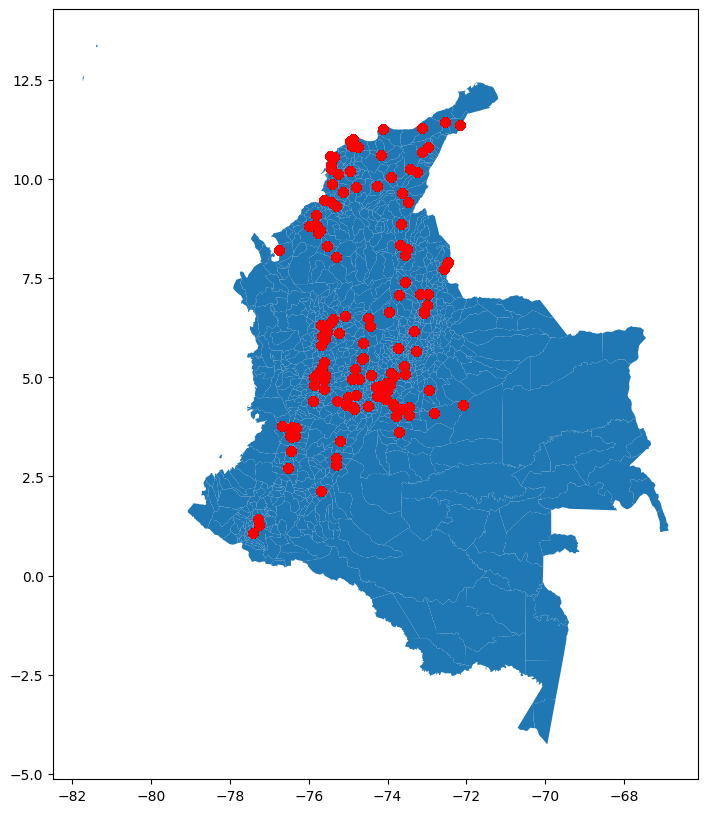

In [33]:

#El archivo mpio.json es un archivo descargado desde datos publicos dónde se establece la división del mapa por municipios de Colombia
#Se aprecia que puede ser relevante la información de conocer la ubicación geografica de los peajes, 
#con esto como principio podríamos establecer más a fondo por ejemplo qué peaje maneja tarifas más altas, cuáles tiene más excentos, cuál tiene más trafico de vehículos
#Se plantea como un análisis simple el poder divisar geograficamente dónde se encuentra cada peaje.
#Con está data inicial podemos ver que por ejemplo hay una gran concentración de peajes hacía el centro del país
import geopandas
import json
from shapely.geometry import Point

#Lee el mpio.json y lo carga como json
with open('./mpio.json') as f:
    geojson_data = json.load(f)
#Se establece un GeoDataframe a partir del mpio.json (Este tiene como estructura principal los features) para almacenar las divisiones por municipios
#CRS hace referencia al sistema de referencia de coordenadas y el EPSG:4326 es el códgo de coordenadas más común
gdf = geopandas.GeoDataFrame.from_features(geojson_data['features'], crs="EPSG:4326")
#Se establece la geometria de los puntos que pintará a partir del dataFrame, en este caso son las latitudes y longitudes de dónde se encuentran los peajes
geometry = [Point(xy) for xy in zip(df['Lat'], df['Lon'])]

#Se establece un GeoDataframe para visualizar cada peaje a partir de las geometrias anteriores donde las lat y las lon son convertidas en puntos X y Y
gdf_peajes = geopandas.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Da el tamaño que tomará la grafica
fig, ax = plt.subplots(figsize=(10, 10))
# Graficar el mapa de la región desde el GeoJSON es decir el mpio
gdf.plot(ax=ax)

# Graficar los puntos de los peajes sobre el mapa
gdf_peajes.plot(ax=ax,  color='red')

plt.show()